In [1]:
# AUTHOR: KATS JAYATHILAKA - 209338R
# DESCRIPTION: This is an assignment done on neural networks for the machine learnining module - MSc2020
#              Classification of MNIST dataset using a deep neural network

In [2]:
# importing tensorflow lib
import tensorflow as tf

In [3]:
# importing built-in MNIST dataset
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits

In [4]:
# splitting into train and test sets by the default proportions
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# imnporting libs for train test splitting
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
x = np.concatenate((x_train, x_test))  # join all rows of attribute data
y = np.concatenate((y_train, y_test))  # join all target classes

In [7]:
TRAIN_SIZE = 0.80  # custom train test split proportion

# Randome state is set to my index no.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=TRAIN_SIZE, random_state=209338)

In [8]:
# importing plotting libs
import matplotlib.pyplot as plt

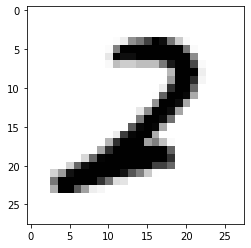

2

In [9]:
# previewing the image and the target class
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
y_train[0]

In [10]:
# z-score standardization of attribute data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

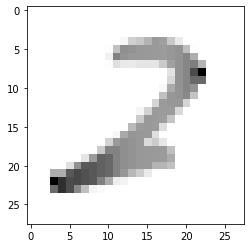

In [11]:
# previewing the image using the standardized data
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

In [12]:
# creating the Deep Neural Network Model
model = tf.keras.models.Sequential()  # feed-forward model

# adding input layer by flattening the input attributes into a single dimension'
model.add(tf.keras.layers.Flatten())

# adding hidden layers
model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.relu))

# adding output layer
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

# compllie the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
EPOCHS = 20

# training for multiple epochs
model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/20
56000/56000 [==============================] - 5s 84us/sample - loss: 0.2371 - acc: 0.9295
Epoch 2/20
56000/56000 [==============================] - 5s 83us/sample - loss: 0.0932 - acc: 0.9706
Epoch 3/20
56000/56000 [==============================] - 5s 82us/sample - loss: 0.0593 - acc: 0.9806
Epoch 4/20
56000/56000 [==============================] - 5s 82us/sample - loss: 0.0432 - acc: 0.9857
Epoch 5/20
56000/56000 [==============================] - 5s 84us/sample - loss: 0.0311 - acc: 0.9899
Epoch 6/20
56000/56000 [==============================] - 4s 76us/sample - loss: 0.0246 - acc: 0.9920
Epoch 7/20
56000/56000 [==============================] - 4s 80us/sample - loss: 0.0203 - acc: 0.9932
Epoch 8/20
56000/56000 [==============================] - 5s 83us/sample - loss: 0.0163 - acc: 0.9944
Epoch 9/20
56000/56000 [==============================] - 4s 77us/sample - loss: 0.0144 - acc: 0.9950
Epoch 10/20
56000/56000 [==============================] - 5s 81us/sample - loss: 

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)

14000/14000 [==============================] - 0s 28us/sample - loss: 0.1533 - acc: 0.9769


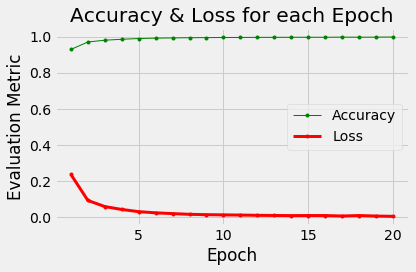

In [26]:
# plotting accuracy for each epoch
from matplotlib import pyplot as plt

epoch_x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
accuracy_y = [0.9295,0.9706,0.9806,0.9857,0.9899,0.9920,0.9932,0.9944,0.9950,0.9956,0.9958,0.9964,0.9964,0.9969,0.9969,0.9969,0.9976,0.9973,0.9976,0.9983]
loss_y = [0.2371,0.0932,0.0593,0.0432,0.0311,0.0246,0.0203,0.0163,0.0144,0.0133,0.0123,0.0108,0.0100,0.0092,0.0096,0.0095,0.0070,0.0096,0.0068,0.0052]

plt.style.use("fivethirtyeight")
# plt.xkcd()

plt.plot(epoch_x, accuracy_y, color="green", linestyle="-", marker=".", linewidth=1, label='Accuracy')

plt.plot(epoch_x, loss_y, ".-r", linewidth=3, label='Loss')

plt.xlabel("Epoch")
plt.ylabel("Evaluation Metric")
plt.title("Accuracy & Loss for each Epoch")
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.savefig("acc_loss_per_epoch.png", dpi=440)
plt.show()